# Coin Flip #

In [1]:
%matplotlib inline

In [2]:
import math
import random
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats, integrate

In [3]:
def multiple_coin_flips(num_of_flips=2**16):
    interval_capture = 0
    current_flip_num = 0
    heads_count = 0
    tails_count = 0
    heads_results = []
    tails_results = []
    while current_flip_num < num_of_flips:
        flip = random.choice(['Heads', 'Tails'])
        if flip == 'Heads':
            heads_count += 1
        elif flip == 'Tails':
            tails_count += 1
        current_flip_num += 1
        if current_flip_num == num_of_flips:
            heads_results.append(heads_count)
            tails_results.append(tails_count)
        elif current_flip_num == (2 ** interval_capture):
            heads_results.append(heads_count)
            tails_results.append(tails_count)
            interval_capture +=1    
    return heads_results, tails_results    

In [4]:
heads_results, tails_results = multiple_coin_flips()

In [5]:
def find_ratios(heads_results, tails_results):
    ratios = []
    for a, b in zip(heads_results, tails_results):
        try: 
            ratios.append(a/b)
        except: 
            ratios.append(0)
    return ratios

In [6]:
results = [a + b for a, b in zip(heads_results, tails_results)]

In [7]:
difference = [a - b for a, b in zip(heads_results, tails_results)]

In [8]:
ratios = find_ratios(heads_results, tails_results)

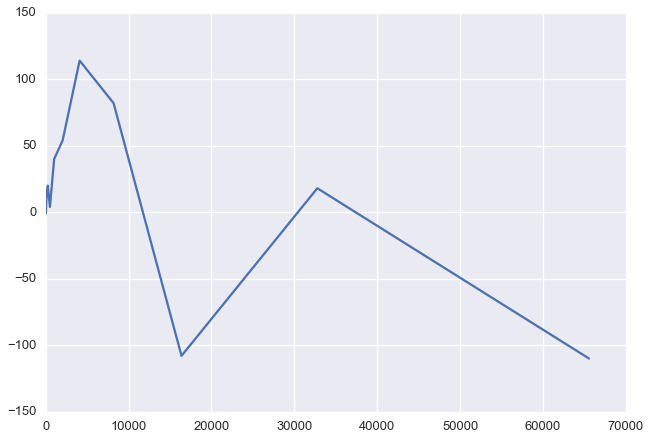

In [9]:
y = difference
x = results

sns.set_context("talk")
plt.plot(x, y)
#plt.xscale('log', basex=2)

plt.show()

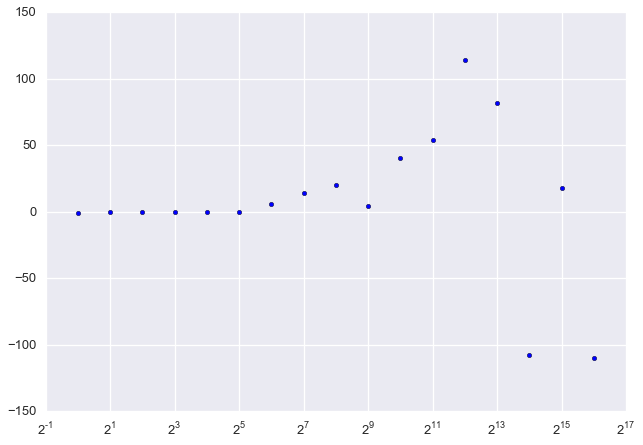

In [10]:
y = difference
x = results

sns.set_context("talk")
plt.scatter(x, y)
plt.xscale('log', basex=2)

plt.show()

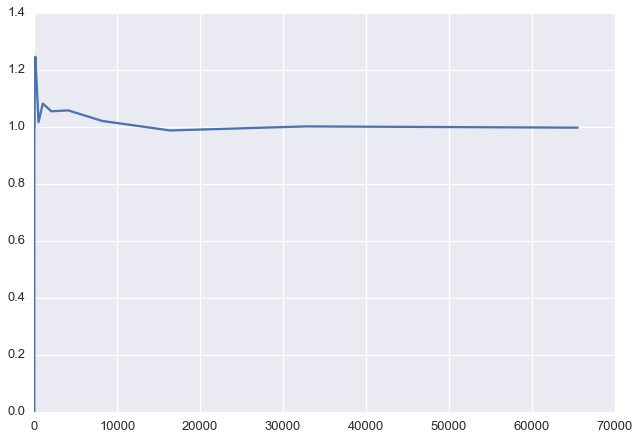

In [12]:
y = ratios
x = results

sns.set_context("talk")
plt.plot(x, y)
#plt.xscale('log', basex=2)

plt.show()

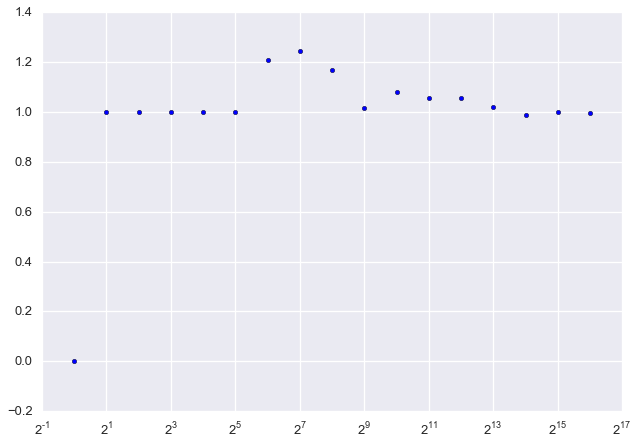

In [13]:
y = ratios
x = results

sns.set_context("talk")
plt.scatter(x, y)
plt.xscale('log', basex=2)
plt.show()

In [14]:
def twenty_times_multiple_coin_tosses():
    master_ratios_list = []
    master_count = 0
    while master_count < 20:
        heads_results, tails_results = multiple_coin_flips()
        ratios_temp = find_ratios(heads_results, tails_results)
        master_ratios_list.append(ratios_temp)
        master_count += 1
    return master_ratios_list 

In [15]:
master_ratios_list = twenty_times_multiple_coin_tosses()

In [16]:
total_list =[item for sublist in master_ratios_list for item in sublist]

In [17]:
zipped = zip(*master_ratios_list)
            
    

In [18]:
mean_list = []
for item in zipped:
    mean_list.append((sum(item))/len(item))

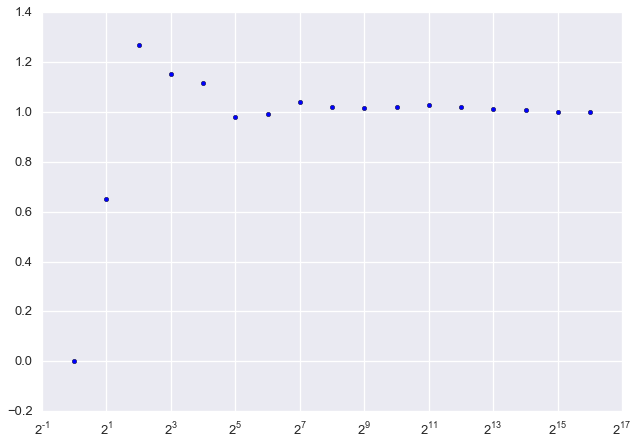

In [19]:
y = mean_list
x = results

sns.set_context("talk")
plt.scatter(x, y)
plt.xscale('log', basex=2)
plt.show()

In [20]:
zipped = zip(*master_ratios_list)
            

In [21]:
std_dev_list = []
for item in zipped:
    std_dev_list.append(st.stdev(item))

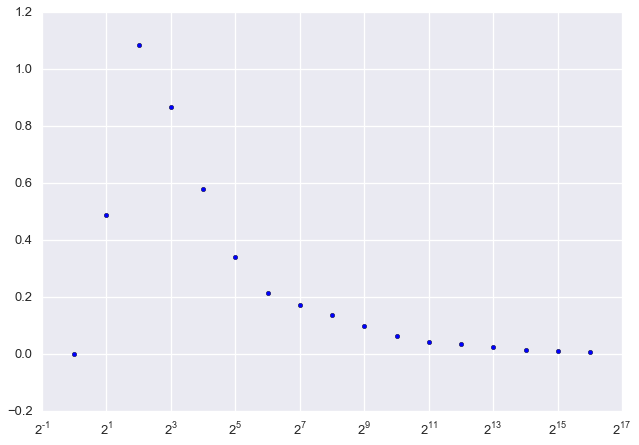

In [22]:
y = std_dev_list
x = results

sns.set_context("talk")
plt.scatter(x, y)
plt.xscale('log', basex=2)
plt.show()

In [23]:
def multiple_coin_flips(num_of_flips):
    current_flip_num = 0
    heads_count = 0
    while current_flip_num < num_of_flips:
        flip = random.choice(['Heads', 'Tails'])
        if flip == 'Heads':
            heads_count += 1
        current_flip_num += 1
    return heads_count/current_flip_num

In [24]:
def histogram_data_grab(num_of_sims, num_of_flips_per_sim):
    list_of_head_to_flips_ratios = []
    count_of_sims = 0
    while count_of_sims < num_of_sims:
        head_to_flips_ratio = multiple_coin_flips(num_of_flips_per_sim)
        list_of_head_to_flips_ratios.append(head_to_flips_ratio)
        count_of_sims += 1
    return list_of_head_to_flips_ratios
        

In [25]:
nums = histogram_data_grab(100000, 100)

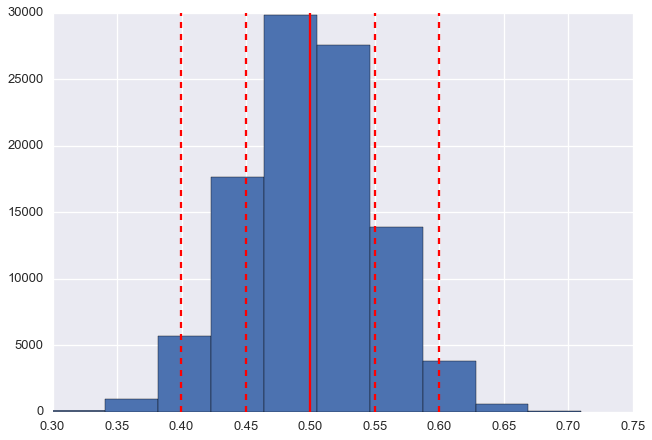

In [26]:
plt.hist(nums)
mean = st.mean(nums)
stdev = st.stdev(nums)
ymin, ymax = plt.ylim()

sns.set_context("talk")
plt.vlines(mean, ymin, ymax, color='red')
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, color='red', linestyles='dashed')
plt.show()

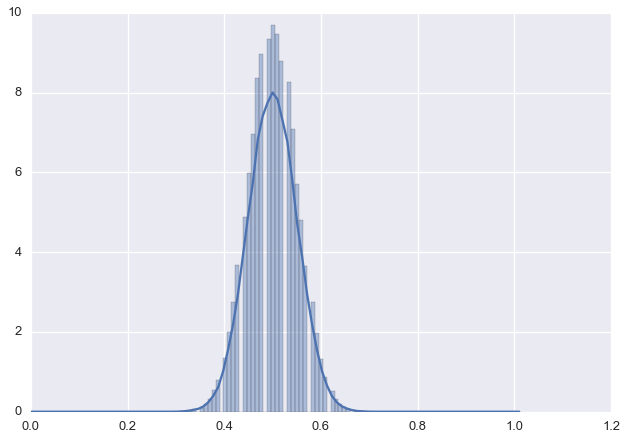

In [30]:
sns.distplot(nums);

In [28]:
nums_two = histogram_data_grab(100000, 1000)

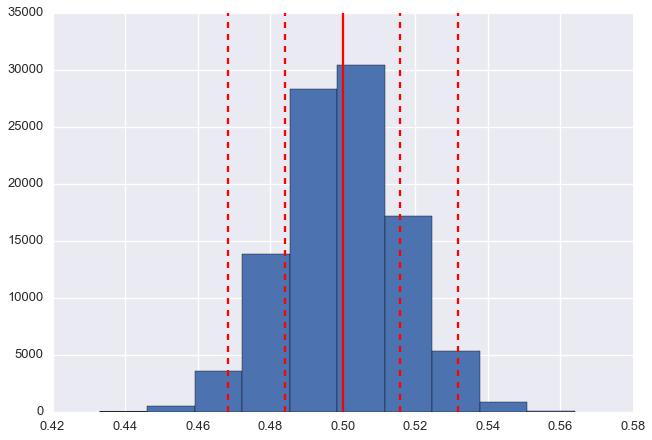

In [29]:
plt.hist(nums_two)
mean = st.mean(nums_two)
stdev = st.stdev(nums_two)
ymin, ymax = plt.ylim()

sns.set_context("talk")
plt.vlines(mean, ymin, ymax, color='red')
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, color='red', linestyles='dashed')
plt.show()

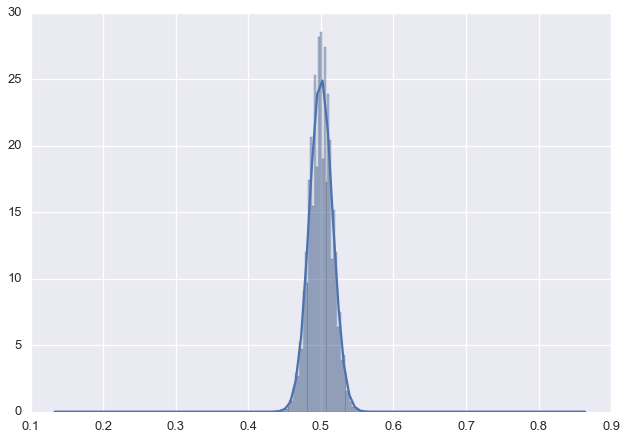

In [33]:
sns.distplot(nums_two);

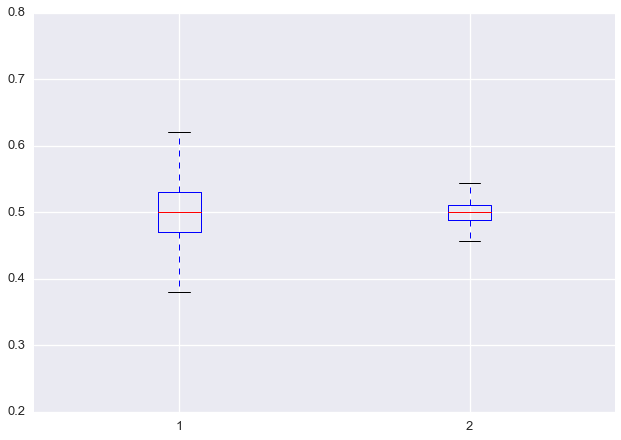

In [32]:
sns.set_context("talk")
plt.boxplot([nums, nums_two])
plt.show()